# GNN for SDM (Species Distribution Modeling): Data Processing

This notebook prepares the data to be used for species distribution modeling using Time Series GNN.

In [1]:
import pyreadr
import pandas as pd
import numpy as np

In [6]:
biotime2_rds = pyreadr.read_r('../data/biotime_v2_full_2025.rds')
biotime2 = biotime2_rds[None]
biotime2.head()

,ID_ALL_RAW_DATA,ABUNDANCE,BIOMASS,ID_SPECIES,SAMPLE_DESC,LATITUDE,LONGITUDE,DEPTH,DAY,MONTH,YEAR,STUDY_ID,newID,valid_name,resolution,taxon
0,1,1.0,NaN,1,1994_8_1_5A,44.244,-122.158,NaN,1,8,1994,194,1,Abagrotis apposita,species,Terrestrial/freshwater invertebrates
1,2,1.0,NaN,1,2004_8_10_39B,44.244,-122.158,NaN,10,8,2004,194,1,Abagrotis apposita,species,Terrestrial/freshwater invertebrates
2,3,2.0,NaN,1,2004_8_10_5L,44.244,-122.158,NaN,10,8,2004,194,1,Abagrotis apposita,species,Terrestrial/freshwater invertebrates
3,4,1.0,NaN,1,2001_8_11_9O,44.244,-122.158,NaN,11,8,2001,194,1,Abagrotis apposita,species,Terrestrial/freshwater invertebrates
4,5,1.0,NaN,1,2001_9_11_11N,44.244,-122.158,NaN,11,9,2001,194,1,Abagrotis apposita,species,Terrestrial/freshwater invertebrates


## Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt

In [2]:
import sys
print(sys.executable)

/Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12


### Examine geospatial data distribution

In [ ]:
unique_locations = biotime2.drop_duplicates(subset=['LATITUDE', 'LONGITUDE'])

# Create the map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.set_title("Unique Locations from biotime2")

# Plot each location
ax.scatter(
    unique_locations['LONGITUDE'],
    unique_locations['LATITUDE'],
    color='red',
    s=20,
    transform=ccrs.PlateCarree()
)

plt.show()

### Analyze the more recorded locations

In [11]:
location_pairs = biotime2.value_counts(subset=['LATITUDE', 'LONGITUDE'])
location_pairs

LATITUDE    LONGITUDE 
 59.817000   22.90000     602332
 39.083333  -96.58333     590244
 33.430000  -111.93000     94186
-30.633300  -71.66670      72770
 34.350000  -106.88000     61068
                           ...  
 26.603600  -77.05980          1
 26.603300  -76.91980          1
 46.750000  -56.41670          1
            -56.16670          1
-60.933400   69.05530          1
Name: count, Length: 553253, dtype: int64

In [22]:
def df_location(value_counts, i):
    lat, lon = value_counts.index[i]
    count = value_counts.iloc[i]
    print(lat, lon, count)
    return biotime2[(biotime2['LATITUDE'] == lat) & (biotime2['LONGITUDE'] == lon)]

### Manhattan, Kansas

In [34]:
i = 1
loc = df_location(location_pairs, i)
loc.head(3)

39.083333 -96.58333 590244


,ID_ALL_RAW_DATA,ABUNDANCE,BIOMASS,ID_SPECIES,SAMPLE_DESC,LATITUDE,LONGITUDE,DEPTH,DAY,MONTH,YEAR,STUDY_ID,newID,valid_name,resolution,taxon
5263314,11064300,1.0,NaN,3618,1988_1_3_s00a-16,39.083333,-96.58333,NaN,3,1,1988,333,317,Accipiter cooperii,species,Birds
5263315,11064301,1.0,NaN,3618,1996_1_9_n04b-2,39.083333,-96.58333,NaN,9,1,1996,333,317,Accipiter cooperii,species,Birds
5263316,11064302,1.0,NaN,3618,1996_6_5_n01b-10,39.083333,-96.58333,NaN,5,6,1996,333,317,Accipiter cooperii,species,Birds


In [35]:
def show_value_counts(df, colname):
    return df[colname].value_counts()

colname = 'taxon'
val_count = show_value_counts(loc, colname)
val_count

taxon
Plants    580983
Birds       9261
Name: count, dtype: int64

In [36]:
colname = 'valid_name'
val_count = show_value_counts(loc, colname)
val_count

valid_name
Andropogon gerardi            21019
Sorghastrum nutans            20484
Dichanthelium oligosanthes    20417
Ambrosia psilostachya         19043
Symphyotrichum ericoides      17904
                              ...  
Buglossoides arvensis             1
Capsella bursa-pastoris           1
Carex blanda                      1
Chenopodium pallescens            1
Zizia aurea                       1
Name: count, Length: 456, dtype: int64

In [37]:
def get_subset_by_taxon(df, taxonname):
    return df[df['taxon'] == taxonname]

In [38]:
taxonname = 'Birds'
loc_taxon = get_subset_by_taxon(loc, taxonname)
val_count = show_value_counts(loc_taxon, colname)
val_count

valid_name
Sturnella magna        500
Molothrus ater         496
Spiza americana        387
Zenaida macroura       356
Colinus virginianus    328
                      ... 
Setophaga magnolia       1
Setophaga virens         1
Empidonax minimus        1
Empidonax traillii       1
Zonotrichia querula      1
Name: count, Length: 132, dtype: int64

In [45]:
loc.YEAR.value_counts().sort_values(ascending=False)

YEAR
2006    28040
2001    25549
2003    23847
1999    23671
2008    23596
2004    23588
2009    23518
2007    23431
2005    23253
1997    23020
2010    23020
2013    22988
2002    22839
2000    22168
2012    21921
2011    21896
2015    21651
1998    21123
2014    20927
1996    19628
1995    18808
1994    17613
1993    13382
1990    10522
1992    10301
1989     9348
1987     8422
1985     8401
1986     8157
1984     6953
1991     6578
1988     6467
1983     4689
1982      616
1981      313
Name: count, dtype: int64

In [40]:
loc.to_csv("../data/manhattan_kansas.csv", index=False)

### Check for missing data

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
loc = pd.read_csv("../data/manhattan_kansas.csv")

In [57]:
loc["MONTH"] = loc['SAMPLE_DESC'].apply(lambda x: int(x.split("_")[1]))

In [58]:
loc.YEAR.min(), loc.YEAR.max()

(1981, 2015)

It seems like for this location, the data is almost complete from 1995 - 2015, only counting species included from 1995. 

Lets check this by excluding the species that's observed in 1995 but not in any one of the years after. This would be highly unlikely if it didn't go extinct. We'll save this info in a new dataframe.

In [47]:
# filter out species recordings before 1995
data = loc[loc.YEAR >= 1995]
data.shape

(478482, 16)

In [59]:
years = data.groupby("YEAR")
year_1995 = years.get_group(1995)

species = year_1995.ID_SPECIES.unique()
species[:10]

array([3630, 3647, 3651, 3701, 37783, 3720, 3729, 3762, 3768, 3771],
      dtype=object)

In [62]:
row_labels = list(species)
col_labels = list(range(1995, 2016))

species_presence = pd.DataFrame(np.zeros((len(row_labels), len(col_labels))), index=row_labels, columns=col_labels)

for year in range(1995, 2016):
    # get the group for each year
    group = years.get_group(year)
    # get the species that was (not) observed that year
    year_species_observed = group.ID_SPECIES.unique()
    not_observed = list(set(species) - set(year_species_observed))
    observed = list(set(species) - set(not_observed))
    species_presence.loc[observed, year] = 1

species_presence.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3630,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3647,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3651,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3701,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37783,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
species_presence.to_csv("../data/species_presence.csv", index=False)

In [69]:
presence_counts = species_presence.sum()
presence_counts

1995    250.0
1996    230.0
1997    229.0
1998    224.0
1999    233.0
2000    219.0
2001    221.0
2002    220.0
2003    229.0
2004    216.0
2005    217.0
2006    224.0
2007    230.0
2008    228.0
2009    200.0
2010    188.0
2011    178.0
2012    178.0
2013    184.0
2014    173.0
2015    185.0
dtype: float64

In [70]:
presence_counts.min(), presence_counts.max()

(173.0, 250.0)

In [77]:
presence_counts = species_presence.sum(axis=1).sort_values(ascending=False)
presence_counts.describe()

count    250.000000
mean      17.824000
std        4.902362
min        1.000000
25%       14.000000
50%       21.000000
75%       21.000000
max       21.000000
dtype: float64

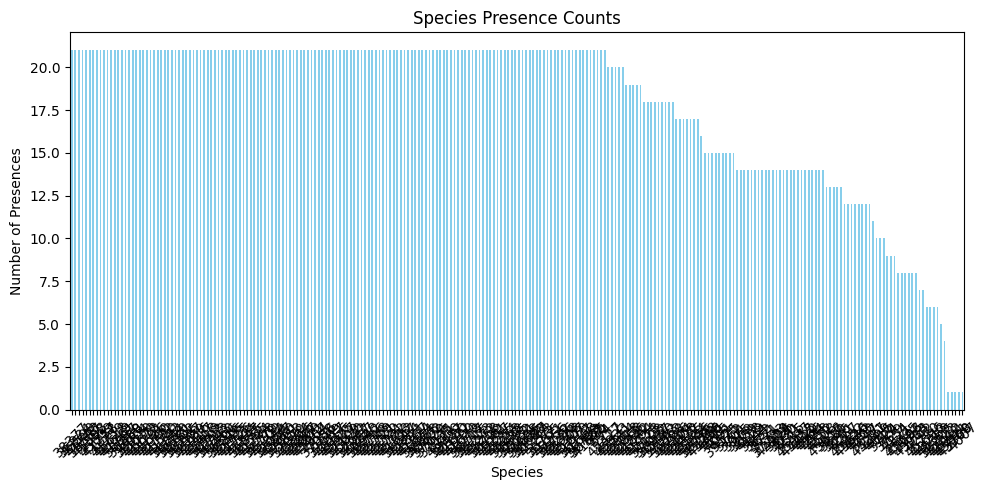

In [75]:
presence_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.ylabel('Number of Presences')
plt.xlabel('Species')
plt.title('Species Presence Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Base on statistics and this dataset, species that have been sighted and recorded less than 14 years in total out of the 20 year span are outliers. So if for any of the 20 years, a species was not seen 6 times, it's not a well-observed species. It's thus good practice to separate those species from species that are regularly sighted, for a different analysis, potential on the endangered status of these species. 

### Heatmap to assess the occurrence matrix

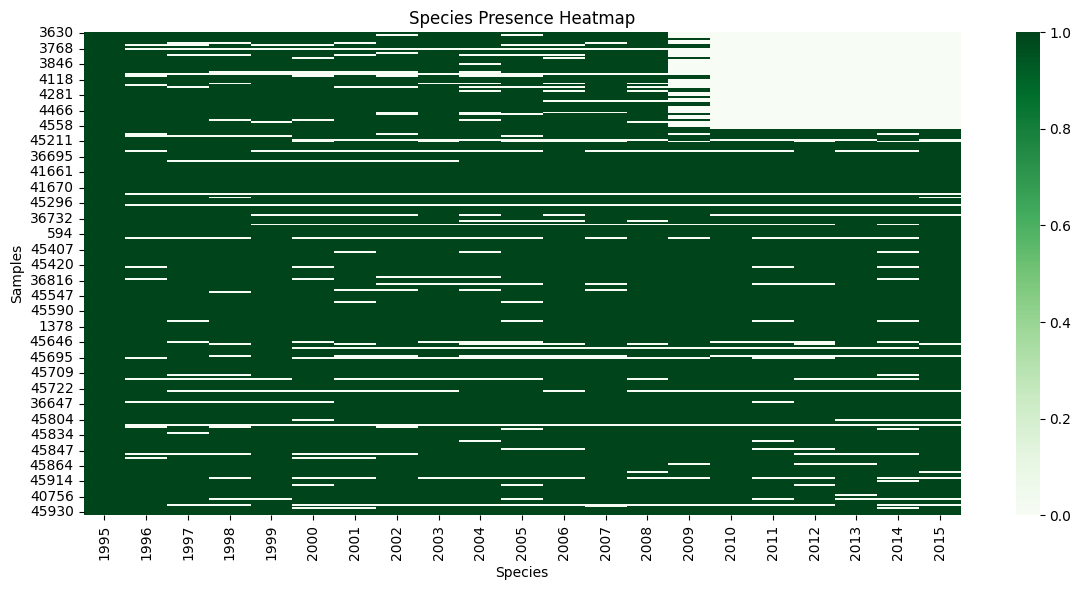

In [85]:
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(species_presence, cmap='Greens', cbar=True, linewidths=0.001, linecolor='gray')

plt.title('Species Presence Heatmap')
plt.xlabel('Species')
plt.ylabel('Samples')
plt.tight_layout()
plt.show()

After filtering out less observed species.

In [87]:
frequent_species_presence = species_presence[species_presence.sum(axis=1) >= 14]

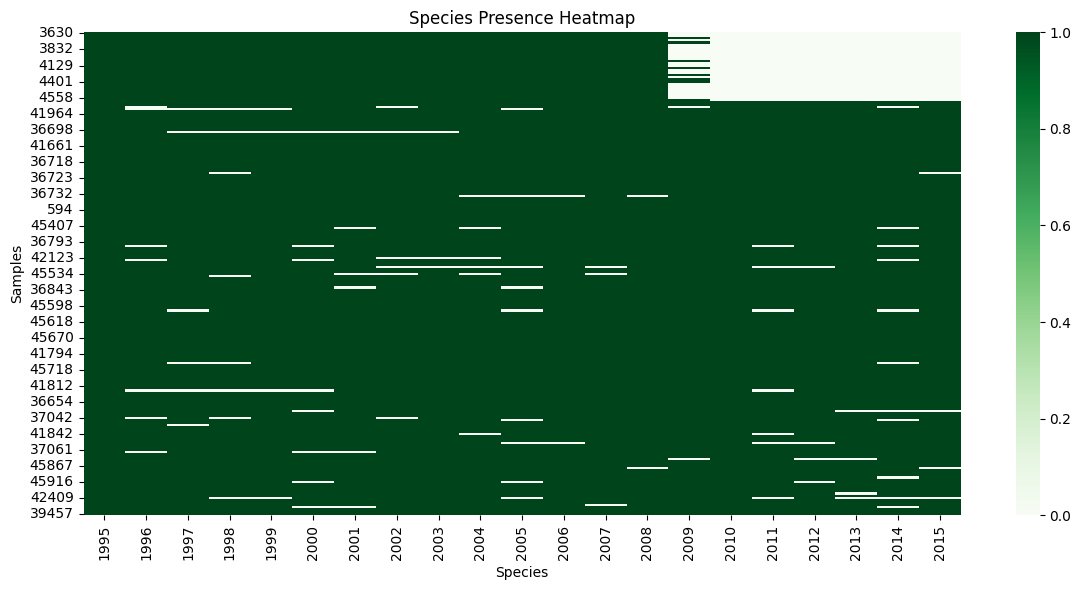

In [88]:
plt.figure(figsize=(12, 6))
sns.heatmap(frequent_species_presence, cmap='Greens', cbar=True, linewidths=0.001, linecolor='gray')

plt.title('Species Presence Heatmap')
plt.xlabel('Species')
plt.ylabel('Samples')
plt.tight_layout()
plt.show()

Most species are observed except the few on top that hasn't been seen since 2008. This is curious. Let's see what they are.

In [93]:
target_species = [3630, 3832, 4129, 4401, 4558]
loc_target_species = loc[loc['ID_SPECIES'].isin(target_species)]
loc_target_species.valid_name.unique()

array(['Agelaius phoeniceus', 'Colinus virginianus', 'Myiarchus crinitus',
       'Sitta carolinensis', 'Vireo olivaceus'], dtype=object)

After some searching it turns out only Colinus virginianus is endangered. This in fact should be a data quality issue. 

In [96]:
selected_species_ids = list(frequent_species_presence.index)

In [97]:
selected_loc = loc[loc['ID_SPECIES'].isin(selected_species_ids)]
selected_loc.to_csv("../data/manhattan_kansas_cleaned.csv", index=False)

In [100]:
selected_loc.shape, loc.shape # just to compare the data size

((576372, 16), (590244, 16))

We lost about 14,000 rows of data, which is not a lot compared to the original 590,000 rows of data. (~2.4% of the original dataset)